In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

OSError: [Errno 2] No such file or directory: '../input'

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
train.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [5]:
train.shape

(2000, 21)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null int64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           2000 non-null int64
int_memory       2000 non-null int64
m_dep            2000 non-null float64
mobile_wt        2000 non-null int64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null int64
px_width         2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             2000 non-null int64
talk_time        2000 non-null int64
three_g          2000 non-null int64
touch_screen     2000 non-null int64
wifi             2000 non-null int64
price_range      2000 non-null int64
dtypes: float64(2), int64(19)
memory usage: 328.2 KB


There are no null values, all the variables are categorical or floating points.

In [7]:
train.price_range.unique()

array([1, 2, 3, 0])

In [8]:
train.price_range.value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

In [9]:
train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [10]:
m = train['ram'].unique()
m.sort()
np.array(m)


array([ 256,  258,  259, ..., 3993, 3996, 3998])

In [11]:
train.columns

Index([u'battery_power', u'blue', u'clock_speed', u'dual_sim', u'fc',
       u'four_g', u'int_memory', u'm_dep', u'mobile_wt', u'n_cores', u'pc',
       u'px_height', u'px_width', u'ram', u'sc_h', u'sc_w', u'talk_time',
       u'three_g', u'touch_screen', u'wifi', u'price_range'],
      dtype='object')

- front camera column probably has an outlier, due to large difference in the 75% and the max 
    values of the column. Also, the mean is getting skwed on the right side due to this.
- in case of sc_w and talk_time the 75% of the values are less than one standard deviation impling a skweness towards the smaller values
- three_g being a boolean variable has a mean on 0.76 showing most of the phones have three g support.

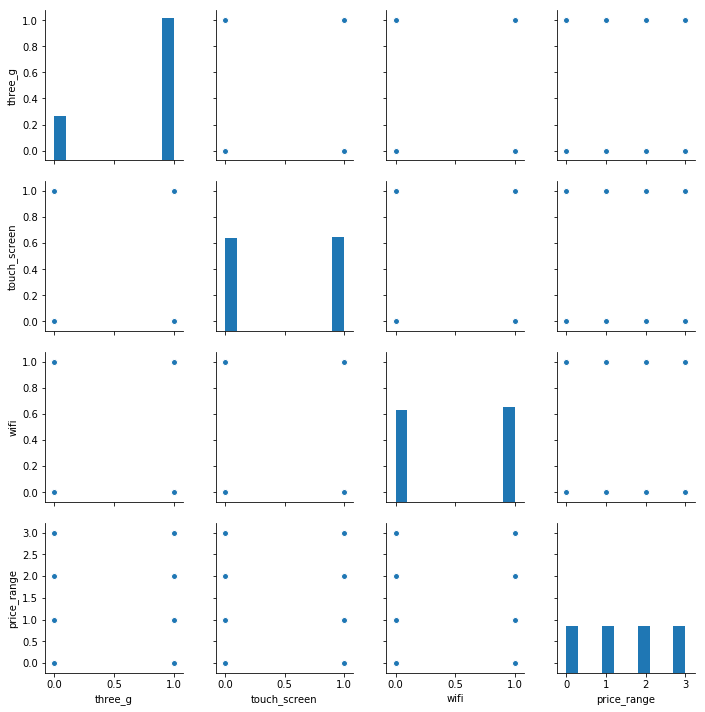

In [12]:
# sns.pairplot(train[[u'battery_power', u'blue', u'clock_speed', u'dual_sim', u'fc','price_range']])
# sns.pairplot(train[[u'four_g', u'int_memory', u'm_dep', u'mobile_wt', u'n_cores', u'pc','price_range']])
# sns.pairplot(train[[u'px_height', u'px_width', u'ram', u'sc_h', u'sc_w', u'talk_time','price_range']])
sns.pairplot(train[[u'three_g', u'touch_screen', u'wifi', u'price_range']])

Only ram shows any kind of relation with price range through scatter plots, all pther are either too small to be visually be seen on a small graph or do not exist.


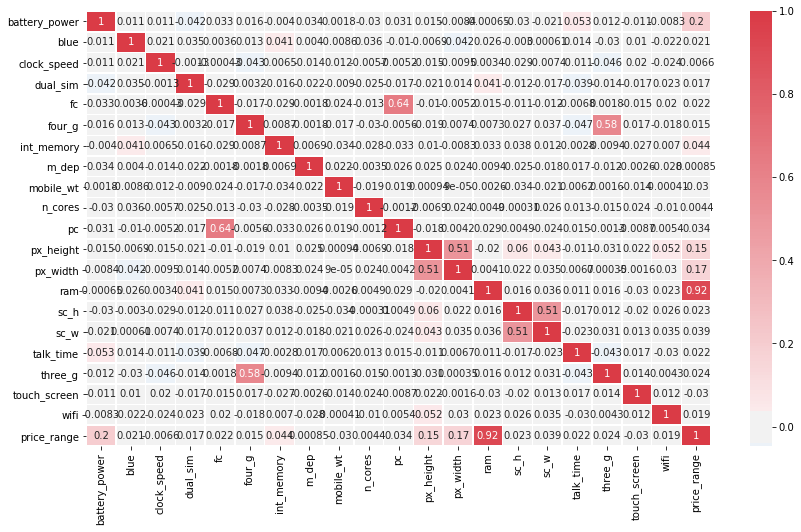

In [65]:
plt.figure(figsize= (14,8))
# cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)
cmap = sns.diverging_palette(250, 10, as_cmap=True)
ax = sns.heatmap(train.corr(),center = 0,annot= True,linewidth=0.5,cmap= cmap)
fig=ax.get_figure()
fig.savefig("cor1.png")

### Correlation coeffiecints for categorical variables doesnt give a proper value as it assumes 3 >2>1 when actually , 3=2=1 but in case of ordinal values it will still stand important.

- m_dep have almost no correlation to the price range and hence can be dropped. (clock_speed and n_cores are also very less)
- pc and fc are positively correlated and since pc correlation with price_range is more, we would like to keep pc
- similarly, we will be keeping three_g and removing four_g. 
- similarly, we will be keeping sc_w and removing sc_h.  
(we can do similar for px_width and px_height but their correlation with price_Range has vey little difference so we would like to keep them both)


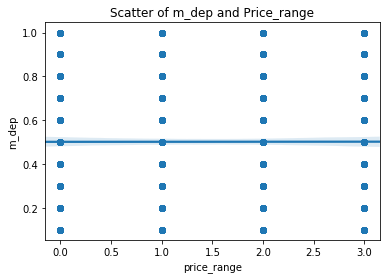

In [13]:
ax = sns.regplot(train['price_range'],train['m_dep'])
plt.title('Scatter of m_dep and Price_range')
ax.get_figure().savefig('m_dep_priceRange.png')

clearly, there is a uniform distribution of the m_dep values across all the price ranges - confired by the straight line. we remove m_dep from further analysis.

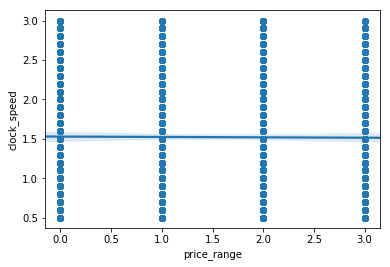

In [67]:
ax =sns.regplot(train['price_range'],train['clock_speed'])

ax.get_figure().savefig('clockSpeed_priceRange.png')

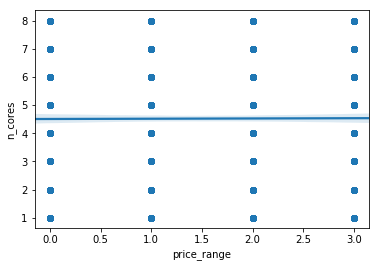

In [68]:
ax = sns.regplot(train['price_range'],train['n_cores'])
ax.get_figure().savefig('Cores_priceRange.png')

clearly, there is a uniform distribution of the m_dep values,n_cores and clock_speed across all the price ranges - confired by the straight line. we remove them from further analysis.

In [42]:
train.drop(['n_cores','clock_speed','m_dep'],inplace=True,axis=1)

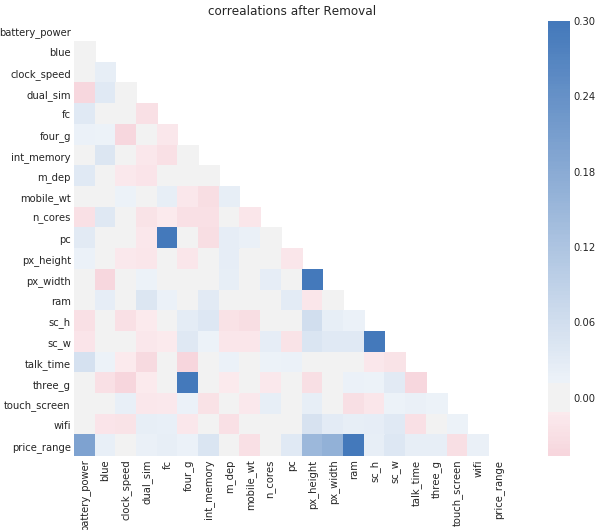

In [14]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)
corr = train.corr()
plt.figure(figsize=(14,8))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True,cmap=cmap,center = 0)
    plt.title('correalations after Removal')
    ax.get_figure().savefig('corr2.png')

# To check for outliers

In [1]:
l = train.columns.values
number_of_columns=len(train.columns)
plt.figure(figsize=(14,8))
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(train[l[i]],color='green',orient='v')
    plt.tight_layout()

NameError: name 'train' is not defined

In [2]:
sns.boxplot(train['fc'])

NameError: name 'sns' is not defined